In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def normalize(features):
    
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)

        #Vector Subtraction
        feature -= fmean

        #Vector Division
        feature /= frange

    return features

def predict(features, weights):
    predictions=np.dot(features, weights)
    return predictions

def cost_function(features, targets, weights):
    N = len(targets)

    predictions = predict(features, weights)

    # Matrix math lets use do this without looping
    sq_error = (predictions - targets)**2

    # Return average squared error among predictions
    return 1.0/(2*N) * sq_error.sum()

def gradient_descent(X, targets, weights, lr):
    
    companies = len(X)

    #1 - Get Predictions
    predictions = predict(X, weights)

    #2 - Calculate error/loss
    error = targets - predictions

    
    gradient = np.dot(-X.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= companies

    #5 - Multiply the gradient by our learning rate
    gradient *= lr

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

weights = np.random.rand(18,1)

carsdata = pd.read_csv(r"C:\Users\Saurabh\Downloads\CarPrice_Assignment.csv",index_col=0)
print(weights)


[[0.75845525]
 [0.22235458]
 [0.67421948]
 [0.34465081]
 [0.30052395]
 [0.35727089]
 [0.73684803]
 [0.26442476]
 [0.39295086]
 [0.77814112]
 [0.12429424]
 [0.20347243]
 [0.81249378]
 [0.26800541]
 [0.19892075]
 [0.57478754]
 [0.30986288]
 [0.00834865]]


In [748]:
price=np.array(carsdata.price)
price.shape= (price.size,1)
normalize(price)
price


array([[ 5.41903156e-03],
       [ 8.00181081e-02],
       [ 8.00181081e-02],
       [ 1.67143992e-02],
       [ 1.03601843e-01],
       [ 4.89868782e-02],
       [ 1.10056339e-01],
       [ 1.40094569e-01],
       [ 2.63102364e-01],
       [ 1.13759407e-01],
       [ 7.82803592e-02],
       [ 9.05687262e-02],
       [ 1.90985786e-01],
       [ 1.94337159e-01],
       [ 2.80231603e-01],
       [ 4.34022378e-01],
       [ 6.96050083e-01],
       [ 5.85951279e-01],
       [-2.01720634e-01],
       [-1.73320852e-01],
       [-1.66369857e-01],
       [-1.91269316e-01],
       [-1.71285204e-01],
       [-1.32061729e-01],
       [-1.74959301e-01],
       [-1.63465334e-01],
       [-1.40700823e-01],
       [-1.17141914e-01],
       [-1.08130445e-01],
       [-7.76303487e-03],
       [-1.68753055e-01],
       [-1.59418861e-01],
       [-1.95564038e-01],
       [-1.67511806e-01],
       [-1.52616816e-01],
       [-1.48495868e-01],
       [-1.48495868e-01],
       [-1.33600878e-01],
       [-1.0

In [749]:
carsdata['fuelsystem']=carsdata['fuelsystem'].astype("category")
carsdata['fuelsystem']=carsdata['fuelsystem'].cat.reorder_categories(['mfi','spfi','1bbl','2bbl', '4bbl', 'spdi','idi',"mpfi"], ordered=True)
carsdata['fuelsystem']=carsdata['fuelsystem'].cat.codes
carsdata['cylindernumber']=carsdata['cylindernumber'].astype("category")
carsdata['cylindernumber']=carsdata['cylindernumber'].cat.reorder_categories(['two','three', 'four', 'five','six',"eight", 'twelve'], ordered=True)
carsdata['cylindernumber']=carsdata['cylindernumber'].cat.codes
carsdata['aspiration']=carsdata['aspiration'].astype("category")
carsdata['aspiration']=carsdata['aspiration'].cat.reorder_categories(['std','turbo'], ordered=True)
carsdata['aspiration']=carsdata['aspiration'].cat.codes

features=np.array(carsdata.loc[:,["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg", "aspiration", "cylindernumber",'fuelsystem']])


In [750]:
features1=normalize(features)
features1.shape

(205, 17)

In [751]:
bias = np.ones(shape=(len(features1),1))
features1 = np.append(features1,bias, axis=1)
features1.shape

(205, 18)

In [752]:
iterations=10000
cost_history=[]
for i in range (iterations):
    cost_history.append(cost_function(features1,price,weights))
    weights=gradient_descent(features1,price,weights,0.3)
print(cost_history)
print(weights)

[0.08440413854398067, 0.0770328061518809, 0.07068769553668339, 0.06520292562344189, 0.06044163334539223, 0.056290299075972064, 0.05265443984961578, 0.04945522998435473, 0.04662678983760605, 0.04411397953604824, 0.041870587728373376, 0.03985783655991879, 0.03804314354981683, 0.036399094100824106, 0.0349025876763619, 0.03353412765568841, 0.03227723030446629, 0.03111793262483175, 0.03004438235478726, 0.029046496255573512, 0.028115675187638158, 0.027244566427612884, 0.026426865295129484, 0.025657149498756648, 0.024930740722838803, 0.02424358890079454, 0.023592175387747067, 0.02297343188285353, 0.02238467248142339, 0.021823536677144727, 0.02128794150063449, 0.020776041284678342, 0.02028619379937702, 0.019816931710646767, 0.019366938490336966, 0.018935028051616346, 0.018520127504210625, 0.018121262524681183, 0.01773754492064776, 0.017368162037528105, 0.01701236771436404, 0.016669474543593656, 0.01633884722984869, 0.016019896876364067, 0.01571207605551127, 0.015414874543248431, 0.015127815616

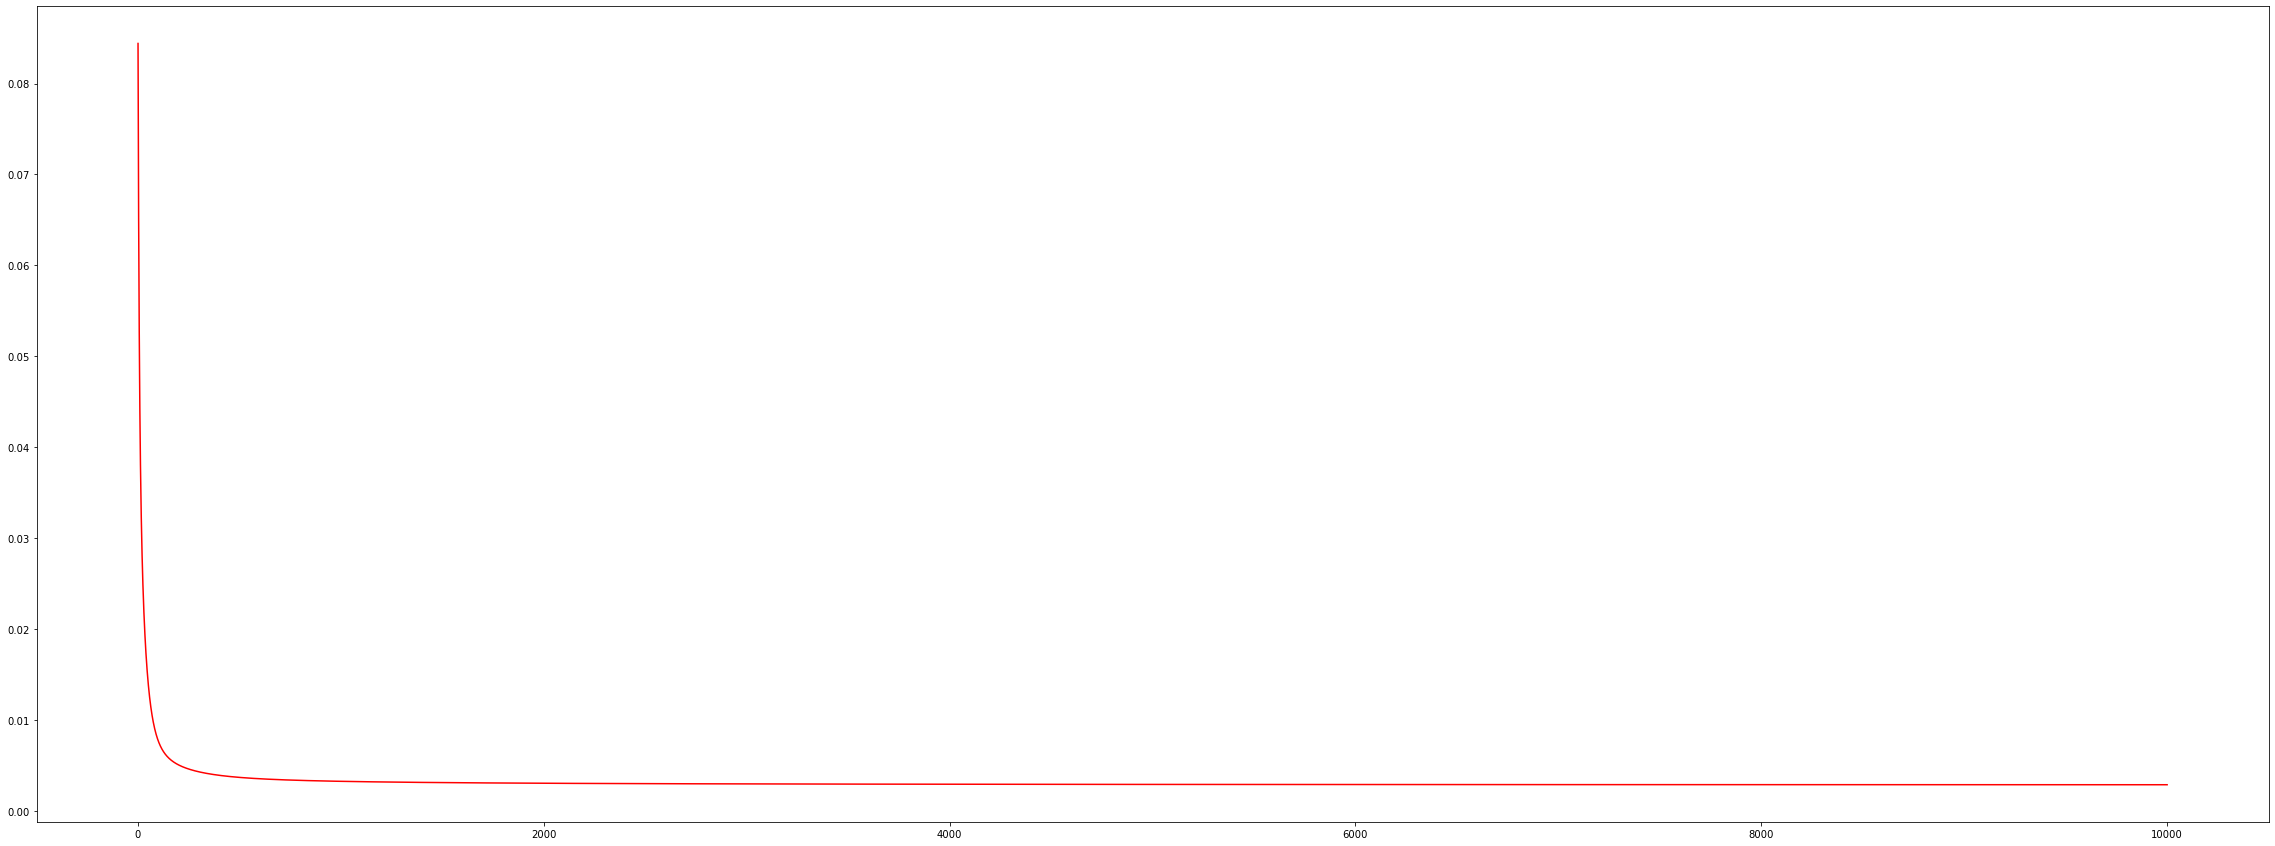

In [753]:
plt.figure(figsize=(40,15))
plt.plot(list(range(1,10001)),cost_history,color='red')

In [754]:
val = np.array(predict(features1,weights))
val=val.flatten()
price=price.flatten()
diff = pd.DataFrame({"Prediction" : val,"Actual Price" : price})
diff

,Prediction,Actual Price
0,-0.005139,0.005419
1,-0.005139,0.080018
2,0.108234,0.080018
3,-0.032458,0.016714
4,0.066322,0.103602
...,...,...
200,0.116985,0.088583
201,0.163917,0.143198
202,0.256534,0.203771
203,0.165602,0.228223


In [755]:
 from sklearn.metrics import r2_score
price_predict = predict(features1, weights)
price_predict=np.array(price_predict)
price_predict.shape=(len(price_predict),1)
r2_score(price_predict,price)

0.8258899861107358

In [746]:
#carsdata = pd.read_csv(r"C:\Users\Saurabh\Downloads\CarPrice_Assignment.csv",index_col=0)
#carsdata['fuelsystem']=carsdata['fuelsystem'].astype("category")
#carsdata['fuelsystem']=carsdata['fuelsystem'].cat.reorder_categories(['mfi','spfi','1bbl','2bbl', '4bbl', 'spdi','idi',"mpfi"], ordered=True)
#carsdata['fuelsystem']=carsdata['fuelsystem'].cat.codes
#carsdata['cylindernumber']=carsdata['cylindernumber'].astype("category")
#carsdata['cylindernumber']=carsdata['cylindernumber'].cat.reorder_categories(['two','three', 'four', 'five','six',"eight", 'twelve'], ordered=True)
#carsdata['cylindernumber']=carsdata['cylindernumber'].cat.codes
#carsdata['aspiration']=carsdata['aspiration'].astype("category")
#carsdata['aspiration']=carsdata['aspiration'].cat.reorder_categories(['std','turbo'], ordered=True)
#carsdata['aspiration']=carsdata['aspiration'].cat.codes

#features=np.array(carsdata.loc[:,["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg", "aspiration", "cylindernumber",'fuelsystem']])

#bias = np.ones(shape=(len(features),1))
#features = np.append(features,bias, axis=1)
#val = np.array(predict(features,weights))
#val=val.flatten()
#price=np.array(carsdata.price)
#diff = pd.DataFrame({"Prediction" : val,"Actual Price" : price})
#diff